In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
movies = pd.read_csv("D:\Boring_Project1\data\movies.csv") 
movies["genres"] = movies["genres"].str.split("|")
movies_explode = movies.explode("genres")

movies_explode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22084 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  22084 non-null  int64 
 1   title    22084 non-null  object
 2   genres   22084 non-null  object
dtypes: int64(1), object(2)
memory usage: 690.1+ KB


<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\WorkStation\AppData\Local\Temp\ipykernel_14424\3344790704.py:1: SyntaxWarning: invalid escape sequence '\B'
  movies = pd.read_csv("D:\Boring_Project1\data\movies.csv")


In [3]:
ratings = pd.read_csv(r"D:\Boring_Project1\data\ratings.csv")
# Since the timestamp is in seconds we will use datetime method from pandas to convert it.
ratings["date"] = pd.to_datetime(ratings["timestamp"], unit='s') 
ratings = ratings.drop(["timestamp"], axis=1)  # dropping the datetime column for uncessary changes 
ratings["date"] = ratings["date"].dt.date # getting only date and excluding the time.
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
 3   date     100836 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.1+ MB


In [4]:
df = movies_explode.merge(ratings) # use explode method to merge
df.head(10)

,movieId,title,genres,userId,rating,date
0,1,Toy Story (1995),Adventure,1,4.0,2000-07-30
1,1,Toy Story (1995),Adventure,5,4.0,1996-11-08
2,1,Toy Story (1995),Adventure,7,4.5,2005-01-25
3,1,Toy Story (1995),Adventure,15,2.5,2017-11-13
4,1,Toy Story (1995),Adventure,17,4.5,2011-05-18
5,1,Toy Story (1995),Adventure,18,3.5,2016-02-11
6,1,Toy Story (1995),Adventure,19,4.0,2000-08-08
7,1,Toy Story (1995),Adventure,21,3.5,2014-08-09
8,1,Toy Story (1995),Adventure,27,3.0,2000-07-04
9,1,Toy Story (1995),Adventure,31,5.0,1996-12-13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274480 entries, 0 to 274479
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  274480 non-null  int64  
 1   title    274480 non-null  object 
 2   genres   274480 non-null  object 
 3   userId   274480 non-null  int64  
 4   rating   274480 non-null  float64
 5   date     274480 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 12.6+ MB


In [6]:
df['year'] = df['title'].str.extract(r'\((\d{4})\)')

In [7]:
df

,movieId,title,genres,userId,rating,date,year
0,1,Toy Story (1995),Adventure,1,4.0,2000-07-30,1995
1,1,Toy Story (1995),Adventure,5,4.0,1996-11-08,1995
2,1,Toy Story (1995),Adventure,7,4.5,2005-01-25,1995
3,1,Toy Story (1995),Adventure,15,2.5,2017-11-13,1995
4,1,Toy Story (1995),Adventure,17,4.5,2011-05-18,1995
...,...,...,...,...,...,...,...
274475,193583,No Game No Life: Zero (2017),Fantasy,184,3.5,2018-09-16,2017
274476,193585,Flint (2017),Drama,184,3.5,2018-09-16,2017
274477,193587,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,2018-09-16,2018
274478,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,184,3.5,2018-09-16,2018


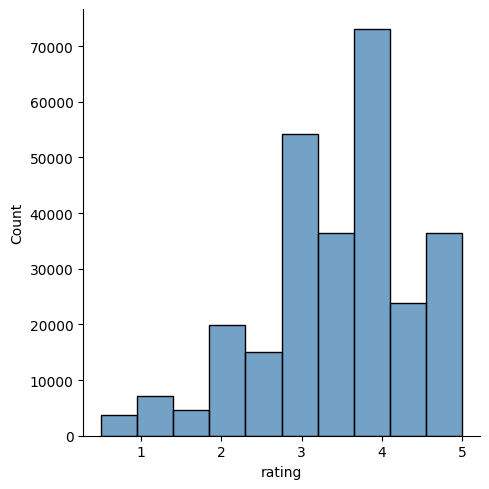

In [8]:
sns.displot(kind= "hist", data= df, x="rating",  bins=10, color= "steelblue")

In [9]:
rating_average = df['rating'].mean()
rating_average

np.float64(3.517797289419994)

In [10]:
genres_count = df["genres"].value_counts().copy()
genres_count

genres
Drama                 41928
Comedy                39053
Action                30635
Thriller              26452
Adventure             24161
Romance               18124
Sci-Fi                17243
Crime                 16681
Fantasy               11834
Children               9208
Mystery                7674
Horror                 7291
Animation              6988
War                    4859
IMAX                   4145
Musical                4138
Western                1930
Documentary            1219
Film-Noir               870
(no genres listed)       47
Name: count, dtype: int64

In [11]:
genre_counts = df['genres'].value_counts().reset_index()
genre_counts.columns = ['genres', 'count']

C:\Users\WorkStation\AppData\Local\Temp\ipykernel_14424\547552060.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot( data= genre_counts, x="genres" , y="count" ,palette="viridis", legend=None)
C:\Users\WorkStation\AppData\Local\Temp\ipykernel_14424\547552060.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # 'ha' for horizontal alignment


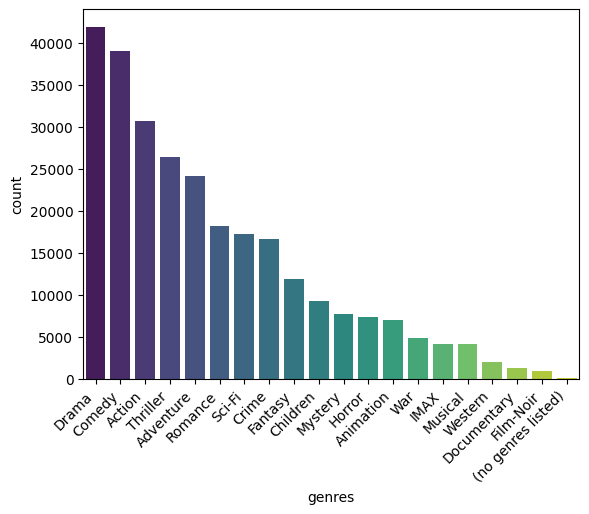

In [12]:

ax = sns.barplot( data= genre_counts, x="genres" , y="count" ,palette="viridis", legend=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # 'ha' for horizontal alignment
plt.show()

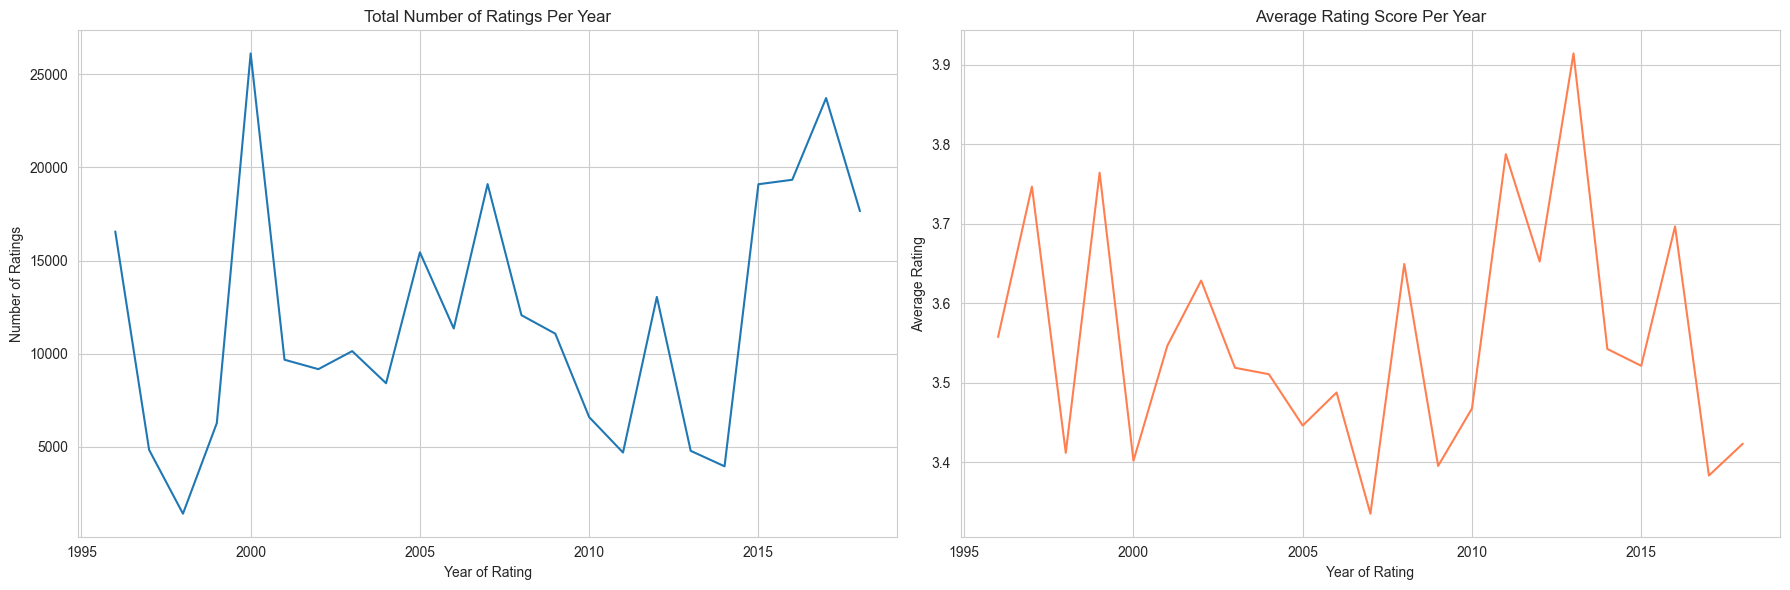

In [13]:
df['date'] = pd.to_datetime(df['date'])

# 2. Extract the year from the 'date' column
df['rating_year'] = df['date'].dt.year

# 3. Group by the rating year and calculate the count and average rating
ratings_by_year = df.groupby('rating_year')['rating'].agg(['count', 'mean']).reset_index()

# 4. Plotting the results
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(18, 6)) # Create two plots side-by-side

# Plot 1: Number of ratings over time
sns.lineplot(ax=axes[0], data=ratings_by_year, x='rating_year', y='count')
axes[0].set_title('Total Number of Ratings Per Year')
axes[0].set_xlabel('Year of Rating')
axes[0].set_ylabel('Number of Ratings')

# Plot 2: Average rating over time
sns.lineplot(ax=axes[1], data=ratings_by_year, x='rating_year', y='mean', color='coral')
axes[1].set_title('Average Rating Score Per Year')
axes[1].set_xlabel('Year of Rating')
axes[1].set_ylabel('Average Rating')

plt.tight_layout()
plt.show()


C:\Users\WorkStation\AppData\Local\Temp\ipykernel_14424\787267701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='genres', y='rating', palette='viridis')


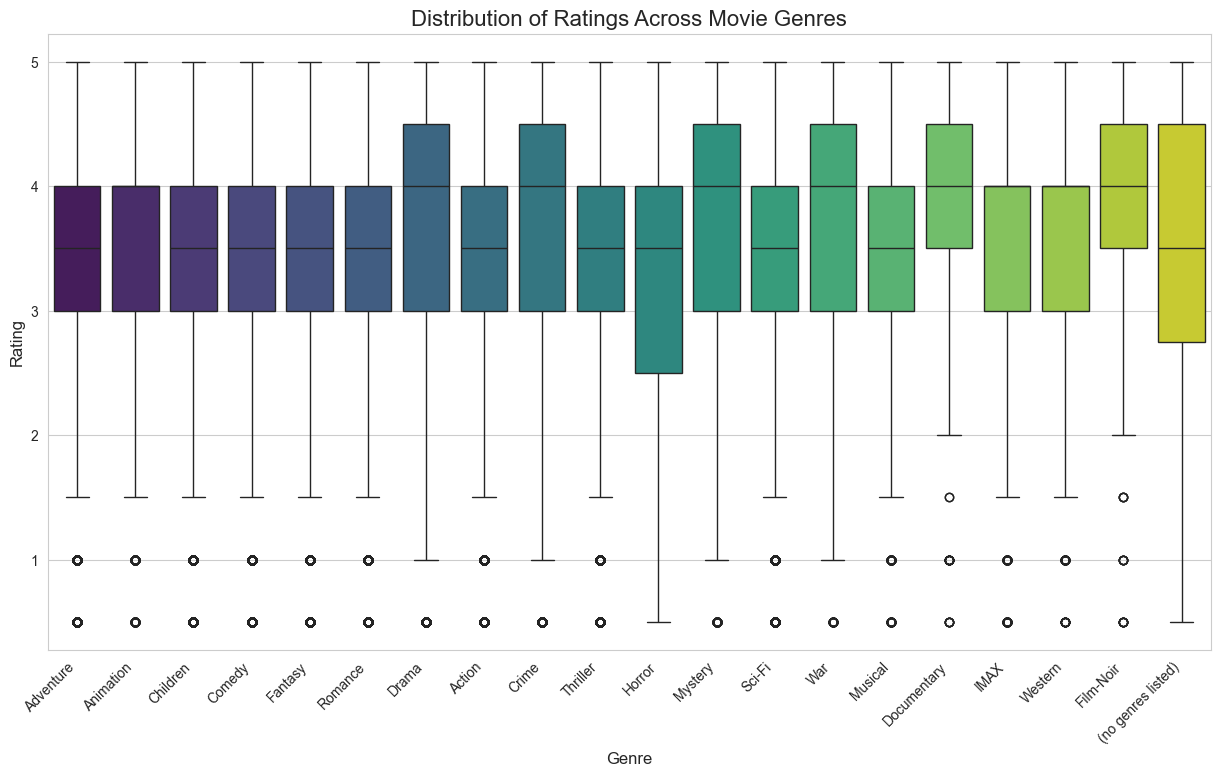

In [14]:

plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='genres', y='rating', palette='viridis')
plt.title('Distribution of Ratings Across Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate genre labels for readability
plt.show()

C:\Users\WorkStation\AppData\Local\Temp\ipykernel_14424\112567052.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_highest_rated, x='mean', y='title', palette='mako')


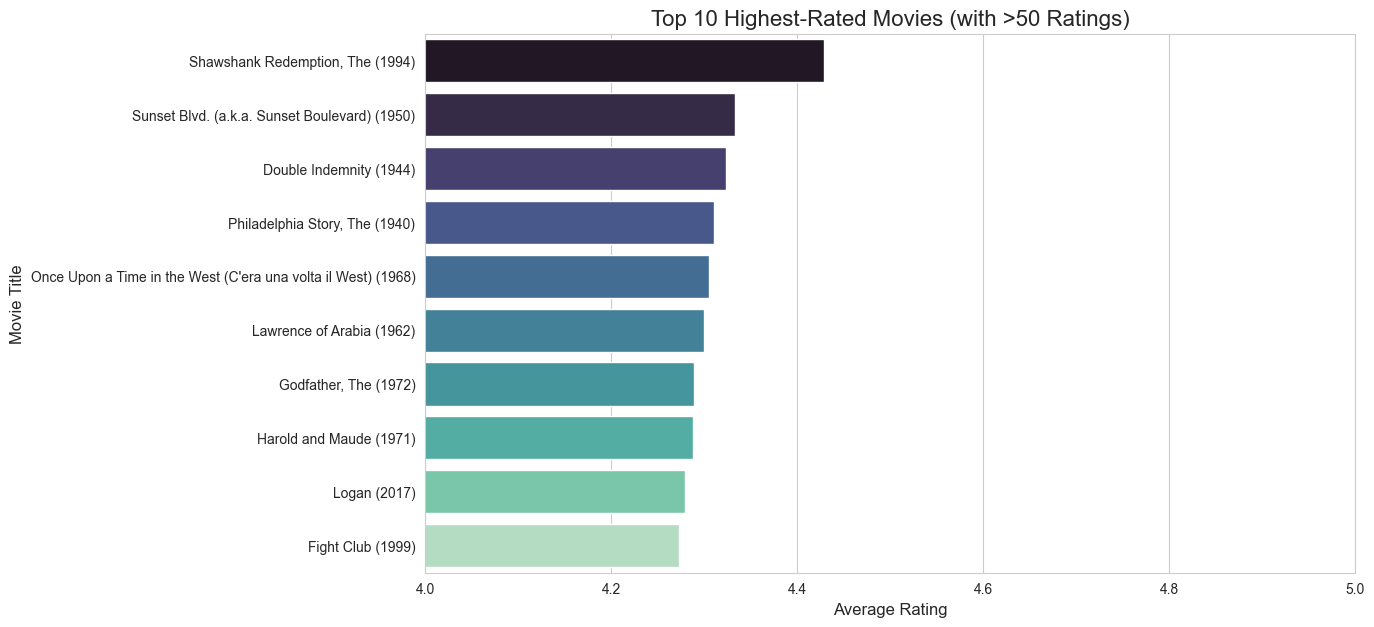

In [15]:
movie_stats = df.groupby('title')['rating'].agg(['mean', 'count']).reset_index()

# Filter out movies with fewer than 50 ratings (you can adjust this threshold)
min_ratings_threshold = 50
popular_movies = movie_stats[movie_stats['count'] >= min_ratings_threshold]

# Sort by average rating to find the top 10
top_10_highest_rated = popular_movies.sort_values(by='mean', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_highest_rated, x='mean', y='title', palette='mako')
plt.title(f'Top 10 Highest-Rated Movies (with >{min_ratings_threshold} Ratings)', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.xlim(4.0, 5.0) # Set x-axis limits to better visualize differences
plt.show()

C:\Users\WorkStation\AppData\Local\Temp\ipykernel_14424\4147113127.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_most_rated, x='count', y='title', palette='rocket')


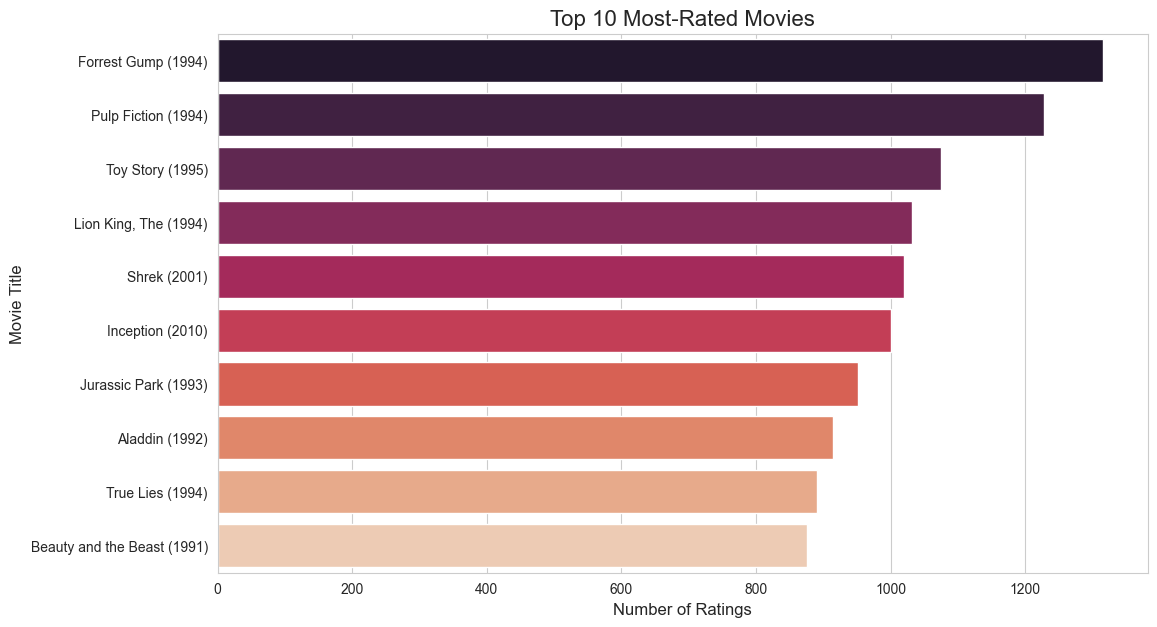

In [16]:
top_10_most_rated = movie_stats.sort_values(by='count', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_most_rated, x='count', y='title', palette='rocket')
plt.title('Top 10 Most-Rated Movies', fontsize=16)
plt.xlabel('Number of Ratings', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.show()